# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
os.chdir("../dataFrames")
finalView = pd.read_csv('finalView.csv',  index_col=0)
redStats = pd.read_csv("redStats.csv", index_col = 0)
blueStats = pd.read_csv("blueStats.csv", index_col =0)
red = pd.read_csv("red.csv", index_col =0)


FileNotFoundError: [Errno 2] No such file or directory: '../dataFrames'

In [ ]:
finalView.head()

# Linear Regression

Training against the data, the prediction in this data set's case would be the winner's win-streak. Splitting the dataset between the blue winner and the red winner to see their stats would be beneficial to see how opposing sides perform (and whether or not the corner assigned details any relevant information).  Initially, it looks at just the win streak for the fighter and their ability to knockout an opponent. This gives us a comparison to initially see. Then, the statistics, to optimize run time, will be displayed as averages overall. 

In [ ]:
red

In [ ]:
red.head()


In [ ]:
red.drop(["Referee", "date", "location", "Winner", "title_bout", "weight_class"], axis = 1, inplace=True)

In [ ]:
red

Just looking at TKOs

In [ ]:
#For the red fighters. 

In [ ]:
def split_fighter_datasets(predictor, target,viewName):

    #Split arrays or matrices into random train and test subsets
    X = viewName[predictor]
    y = viewName[target]
    fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test = train_test_split(X, y, test_size = 0.6, random_state=42)
    return fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test

Training the data

In [ ]:
predictor=['R_win_by_KO/TKO']
target='R_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,red)
regr = linear_model.LinearRegression()

In [ ]:
def calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test):
    # Train the model using the training sets
    regr.fit(fighter_X_train,fighter_y_train)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(fighter_y_test, regr.predict(fighter_X_test)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(fighter_y_test, regr.predict(fighter_X_test)))

    print ('Variance Score: %.2f' % regr.score(fighter_X_test, fighter_y_test))

    # Plot outputs
    plt.scatter(fighter_X_test, fighter_y_test,  color='black')
    plt.plot(fighter_X_test, regr.predict(fighter_X_test), color='blue', linewidth=3)
    plt.xlabel(predictor[0])
    plt.ylabel(target)
    plt.title(target + " vs " + predictor[0], fontsize=15, fontweight='bold')

    plt.show()
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
#looking at the Blue fighters TKO's. 
blueStats

In [ ]:
predictor=['B_win_by_KO/TKO']
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
def calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test):
    # Train the model using the training sets
    regr.fit(fighter_X_train,fighter_y_train)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(fighter_y_test, regr.predict(fighter_X_test)))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(fighter_y_test, regr.predict(fighter_X_test)))

    print ('Variance Score: %.2f' % regr.score(fighter_X_test, fighter_y_test))

    # Plot outputs
    plt.scatter(fighter_X_test, fighter_y_test,  color='black')
    plt.plot(fighter_X_test, regr.predict(fighter_X_test), color='blue', linewidth=3)
    plt.xlabel(predictor[0])
    plt.ylabel(target)
    plt.title(target + " vs " + predictor[0], fontsize=15, fontweight='bold')

    plt.show()
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

# Computing Averages...

In [ ]:
def pairwise_metrics(viewColor, stringTarget):
#    Updates a dictionary with its metrics for  the pairwise features in the dataset. 
#    And to produce a pair of features most similar to each other
#    Which would be beneficial in determining fighter's similarity. 
#     Args:
#       viewColor, the view you wish to use
#       stringTarget the target value you wish to use 

    
    i = 1

    # Divide columns into features and class.
    features = list(viewColor.columns)
    #classes = features[-1] # create class column
    #del features[-1] # delete class column from feature vector
    colorsDictionary = {"Coefficients": None, "Mean Squared Error": None, "Coefficient of determination": None, "Variance Score": None}
    listCoef = []
    listMSE = []
    listCoefOfDetermination = []
    listVariance = []

    # Generate an nxn subplot figure, where n is the number of features.
#     figure = pl.figure(figsize=(5*(len(viewColor.columns)-1), 4*(len(viewColor.columns)-1)))
    for col1 in viewColor[features]:
        for col2 in viewColor[features]:
                target = str(stringTarget) 
                #Split arrays or matrices into random train and test subsets
                fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test = split_fighter_datasets(col1, target,viewColor)
                
                #Gives a new shape to an array without changing its data.
                fighter_X_train = fighter_X_train.values.reshape(-1, 1)
                fighter_y_train = fighter_y_train.values.reshape(-1, 1)
                fighter_X_test = fighter_X_test.values.reshape(-1, 1)
                fighter_y_test = fighter_y_test.values.reshape(-1, 1)
                # Create linear regression object
                reg = linear_model.LinearRegression()
                # Train the model using the training sets
                
                reg.fit(fighter_X_train,fighter_y_train)
                # The coefficients

                listCoef.append(reg.coef_)
                # The mean squared error
                
                listMSE.append(mean_squared_error(fighter_y_test, reg.predict(fighter_X_test)))

                # The coefficient of determination: 1 is perfect prediction
                listCoefOfDetermination.append( r2_score(fighter_y_test, reg.predict(fighter_X_test)))
                
                #The variance score
                listVariance.append(reg.score(fighter_X_test, fighter_y_test))
                
    return listCoef,listMSE, listCoefOfDetermination, listVariance
                

In [ ]:
def listAverages (listCoef, listMSE, listCoefOfDetermination, listVariance):
    dictionary = {"Coefficients": None, "Mean Squared Error": None, "Coefficient of determination": None, "Variance Score": None}
    counter1 = 0
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0 
    for i in listCoef: 
        sum1+=i 
        counter1+=1
    for j in listMSE: 
        sum2+=j 
    for k in listCoefOfDetermination: 
        sum3+=i 
    for alpha in listVariance: 
        sum4+=alpha
    
    dictionary.update({"Coefficients": sum1/counter1})
    dictionary.update({"Mean Squared Error": sum2/counter1})
    dictionary.update({"Coefficient of determination": sum3/counter1})
    dictionary.update({"Variance Score": sum4/counter1})

    
    return dictionary
    

In [ ]:
#For the Blue Fighters

In [ ]:
blueCoef, blueMSE, blueCoefOfDetermination, blueVariance = pairwise_metrics(blueStats, "B_wins" )

In [ ]:
blueAverages = listAverages(blueCoef, blueMSE, blueCoefOfDetermination, blueVariance)

In [ ]:
blueAverages

In [ ]:
blueMetrics = pd.DataFrame([blueAverages], columns=blueAverages.keys())


In [ ]:
blueMetrics

In [ ]:
#For the Red Fighters

In [ ]:
redStats.drop(["Referee"], axis =1, inplace=True)

In [ ]:
redStats.drop(["R_Stance"], axis =1, inplace=True)

In [ ]:
redCoef, redMSE, redCoefOfDetermination, redVariance = pairwise_metrics(redStats, "R_wins")

In [ ]:
redAverages = listAverages(redCoef, redMSE, redCoefOfDetermination, redVariance)

In [ ]:
redMetrics = pd.DataFrame([redAverages], columns=redAverages.keys())


In [ ]:
redMetrics

# Determining the best fit pair of features

In [ ]:
predictor=['B_total_rounds_fought'] 
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
predictor=['B_longest_win_streak'] 
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
predictor=['B_avg_KD'] 
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
predictor=['B_total_time_fought(seconds)'] 
target='B_age'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
predictor=['B_Height_cms'] 
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

In [ ]:
calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)

In [ ]:
predictor=['B_Weight_lbs'] 
target='B_wins'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target,blueStats)

Coefficients: 
 [0.00276127]
Mean squared error: 11.14
Coefficient of determination: -0.00
Variance Score: -0.00


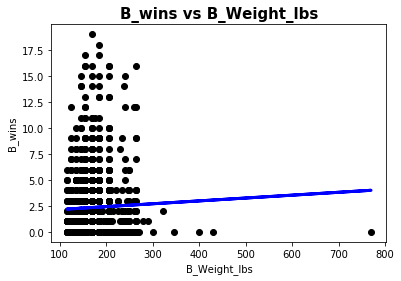

In [262]:

calculate_and_plot_fighter_linear_regression(regr, fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test)